In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#Leo los datos del archivo '.csv', los datos estan separados por ';', la fila N°1 son los titulos y no se crea la columna index

modelo = pd.read_csv(f'{os.getcwd()}/Modelo_MMS_1.csv',
            sep=',',
            header=1,
            index_col=False)
df=pd.DataFrame(modelo)


In [27]:
df

,time,SENSOR_TC_Temperature01,SENSOR_TC_Temperature02,SENSOR_TC_Temperature03,SENSOR_TC_Temperature04,SENSOR_TC_Temperature05,SENSOR_TC_Temperature06,SENSOR_TC_Temperature07,SENSOR_TC_Temperature08,SENSOR_TC_Temperature09,...,SENSOR_TC_Temperature66,SENSOR_TC_Temperature67,SENSOR_TC_Temperature68,SENSOR_TC_Temperature69,SENSOR_TC_Temperature70,SENSOR_TC_Temperature71,SENSOR_TC_Temperature72,L1_ActCastSpeed,L1_SelMouldID,L1_ActMouldWidthBOC
0,30.04.2021 12:13:19.215407,111.9,123.2,121.0,124.1,128.7,113.6,126.8,119.6,127.7,...,102.7,96.1,99.3,96.1,99.1,106.5,102.5,0.9,6,1772.02
1,30.04.2021 12:13:19.465407,111.9,123.3,121.0,124.1,128.7,113.6,126.8,119.6,127.7,...,102.7,96.1,99.3,96.1,99.1,106.5,102.5,0.9,6,1772.02
2,30.04.2021 12:13:19.715407,111.9,123.3,121.0,124.1,128.7,113.6,126.8,119.6,127.7,...,102.7,96.1,99.3,96.1,99.1,106.5,102.5,0.9,6,1772.02
3,30.04.2021 12:13:19.965407,111.9,123.3,120.9,124.1,128.7,113.7,126.6,119.6,127.6,...,102.7,96.1,99.3,96.1,99.1,106.5,102.3,0.9,6,1772.02
4,30.04.2021 12:13:20.215407,111.9,123.4,120.8,124.1,128.7,113.7,126.6,119.7,127.7,...,102.8,96.1,99.3,96.1,99.2,106.5,102.1,0.9,6,1772.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,30.04.2021 12:15:30.965407,108.3,121.8,118.3,125.0,127.6,115.1,127.7,121.7,127.1,...,103.7,94.5,98.8,94.1,98.5,105.5,107.0,0.9,6,1772.02
528,30.04.2021 12:15:31.215407,108.3,121.8,118.3,125.0,127.6,115.1,127.7,121.7,127.1,...,103.7,94.5,98.8,94.1,98.5,105.5,107.0,0.9,6,1772.02
529,30.04.2021 12:15:31.465407,108.2,121.7,118.2,125.0,127.7,115.1,127.7,121.8,127.2,...,103.7,94.5,98.8,94.1,98.4,105.5,107.0,0.9,6,1772.02
530,30.04.2021 12:15:31.715407,108.2,121.7,118.2,124.9,127.7,115.0,127.7,121.8,127.2,...,103.7,94.5,98.8,94.1,98.4,105.5,107.0,0.9,6,1772.02


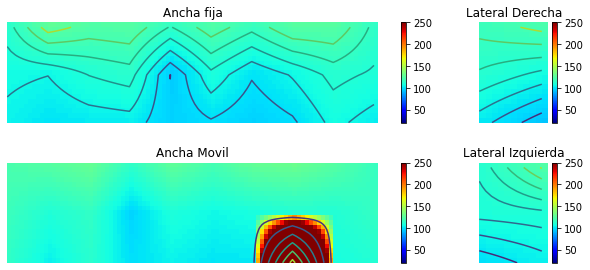

In [28]:
#////////////////////////////Cambio de las cabeseras////////////////////////////


titulos= ['fecha','tc01','tc02','tc03','tc04','tc05','tc06',
        'tc07','tc08','tc09','tc10','tc11','tc12','tc13','tc14','tc15','tc16','tc17','tc18','tc19',
        'tc20','tc21','tc22','tc23','tc24','tc25','tc26','tc27','tc28','tc29','tc30','tc31','tc32',
        'tc33','tc34','tc35','tc36','tc37','tc38','tc39','tc40','tc41','tc42','tc43','tc44','tc45',
        'tc46','tc47','tc48','tc49','tc50','tc51','tc52','tc53','tc54','tc55','tc56','tc57','tc58',
        'tc59','tc60','tc61','tc62','tc63','tc64','tc65','tc66','tc67','tc68','tc69','tc70','tc71',
        'tc72','velocidad','num_molde','ancho']
 

df.columns=titulos


#////////////////////////////Temperaturas por Placas////////////////////////////


lat_izq = np.array(df[['tc01','tc02',
                       'tc25','tc26',
                       'tc49','tc50']], np.float64)


lat_der = np.array(df[['tc13','tc14',
                       'tc37','tc38',
                       'tc61','tc62']], np.float64)

 
ancha_movil = np.array(df[['tc03','tc04','tc05','tc06','tc07','tc08','tc09','tc10','tc11','tc12',
                           'tc27','tc28','tc29','tc30','tc31','tc32','tc33','tc34','tc35','tc36',
                           'tc51','tc52','tc53','tc54','tc55','tc56','tc57','tc58','tc59','tc60']], np.float64)#corregir la 57

 
ancha_fija = np.array(df[['tc15','tc16','tc17','tc18','tc19','tc20','tc21','tc22','tc23','tc24',
                          'tc39','tc40','tc41','tc42','tc43','tc44','tc45','tc46','tc47','tc48',
                          'tc63','tc64','tc65','tc66','tc67','tc68','tc69','tc70','tc71','tc72']],np.float64)



vel_linea = np.array(df[['velocidad']],np.float64)

ancho_linea = np.array(df[['ancho']],np.float64)


def conversion_ancha(placa,row):
    
    fila1=[]
    for j in range(20,30):
        fila1.append(placa[row][j])

    fila2=[]
    for j in range(10,20):
        fila2.append(placa[row][j])

    fila3=[]
    for j in range(0,10):
        fila3.append(placa[row][j])


    nuevo=np.array(np.atleast_1d(fila1,fila2,fila3)).reshape(3,10)

    return nuevo


def conversion_angosta(placa,row):
    
    fila1=[]
    for j in range(4,6):
        fila1.append(placa[row][j])

    fila2=[]
    for j in range(2,4):
        fila2.append(placa[row][j])

    fila3=[]
    for j in range(0,2):
        fila3.append(placa[row][j])


    nuevo=np.array(np.atleast_1d(fila1,fila2,fila3)).reshape(3,2)

    return nuevo


def promedio(placa_s,placa_temp,fila,row):

    temparaturas=conversion_ancha(placa_temp,row)

    valores_ok=[]

    for j in range(0,10): #recorro las columnas
        if placa_s[fila][j]==1:
            valores_ok.append(temparaturas[fila][j])
    
    valor_promedio=sum(valores_ok)/len(valores_ok)

    return valor_promedio

#///////////////////////////////////////////////////////////////////////////////
#
#                                   Interpolacion
#
#///////////////////////////////////////////////////////////////////////////////



def scalematrix(m, scale=10):
  # Crear matriz con ceros del tamaño apropiado
  r = np.zeros(((m.shape[0]-1)*scale+1, (m.shape[1]-1)*scale+1))

  # Rellenar filas multiplo de scale (interpolando entre valores de los elementos de la fila)
  for fil in range(m.shape[0]):
    for col in range(m.shape[1]-1):
      r[fil*scale, col*scale:(col+1)*scale+1] = np.linspace(m[fil,col], m[fil,col+1], scale+1)

  # Rellenar resto de ceros, interpolando entre elementos de las columnas
  for fil in range(m.shape[0]-1):
    for col in range(r.shape[1]):
      r[fil*scale:(fil+1)*scale + 1, col] = np.linspace(r[fil*scale,col], r[(fil+1)*scale, col], scale+1)
  return r


#////////////////////////////GRAFICOS////////////////////////////



def _annotate(ax, x, y, title):

    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_title(title)

#///////////////////////////////////////////////////////////////////////////////
#
#                                   ANIMACION
#
#///////////////////////////////////////////////////////////////////////////////

#Para Placas Anchas
nrows = 21#3
ncols = 91#10
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)

#Para Placas Angostas
nrows2 = 21#3
ncols2 = 11#2
x2 = np.arange(ncols2 + 1)
y2 = np.arange(nrows2 + 1)

#////////////////////////////////////////////////////////////////////////////////

fig = plt.figure(figsize=(10, 7))#Tamaño de la ventana
gs = gridspec.GridSpec(3, 6, wspace=0.1, hspace=0.4) #Es para dibujar graficos(3 filas x 6 columnas)

#-------------------------------------------------------------------------------

ax = plt.subplot(gs[1,0:5])
ax.set_axis_off()
Z=scalematrix(conversion_ancha(ancha_movil,2), scale=10)#conversion_ancha(ancha_movil,1)
cmap = mpl.cm.jet

quad1 = ax.pcolormesh(x, y, Z, cmap=cmap, shading='auto',vmin=20, vmax=250)#vmin=Z.min(), vmax=Z.max())
contour1 = ax.contour(Z)
cb1 = fig.colorbar(quad1, ax=ax)

#-------------------------------------------------------------------------------

ax2 = plt.subplot(gs[0,0:5])
ax2.set_axis_off()
Z2=scalematrix(conversion_ancha(ancha_fija,2), scale=10)#conversion_ancha(ancha_fija,1)
quad2 = ax2.pcolormesh(x, y, Z2, cmap=cmap, shading='auto',vmin=20, vmax=250)#vmin=Z2.min(), vmax=Z2.max())
contour2 = ax2.contour(Z2)
cb2 = fig.colorbar(quad2, ax=ax2)


#-------------------------------------------------------------------------------

ax3 = plt.subplot(gs[0,5:])
ax3.set_axis_off()
Z3=scalematrix(conversion_angosta(lat_der,2), scale=10)#conversion_angosta(lat_der,2)
quad3 = ax3.pcolormesh(x2, y2, Z3, cmap=cmap, shading='auto',vmin=20, vmax=250)#vmin=Z3.min(), vmax=Z3.max())
contour3 = ax3.contour(Z3)
cb3 = fig.colorbar(quad3, ax=ax3)

#-------------------------------------------------------------------------------

ax4 = plt.subplot(gs[1,5:])
ax4.set_axis_off()
Z4=scalematrix(conversion_angosta(lat_izq,2), scale=10)#conversion_angosta(lat_izq,2)
quad4 = ax4.pcolormesh(x2, y2, Z4, cmap=cmap, shading='auto',vmin=20, vmax=250)#vmin=Z4.min(), vmax=Z4.max())
contour4 = ax4.contour(Z4)
cb4 = fig.colorbar(quad4, ax=ax4)

#-------------------------------------------------------------------------------

_annotate(ax, x, y, "Ancha Movil")
_annotate(ax2, x, y, "Ancha fija")
_annotate(ax3, x2, y2, "Lateral Derecha")
_annotate(ax4, x2, y2, "Lateral Izquierda")

num_celdas = vel_linea.size-1

plt.show()


# Temperaturas en la Placa Fija

 -------------------
| Placa Ancha Movil |
 -------------------


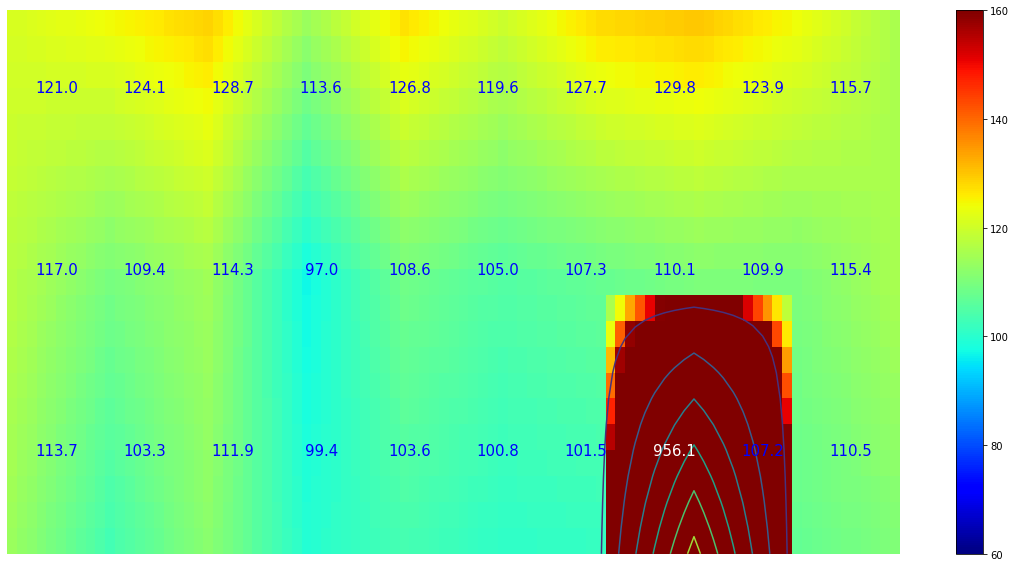

Fecha: 30.04.2021
Hora: 12:13:19
Velocidad: 0.9 m/min
Molde: 6
Ancho: 1772.02


In [29]:
global contour1
#Para Placas Anchas
nrows = 21#3
ncols = 91#10
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)

celda = 0


#////////////////////////////////////////////////////////////////////////////////

fig = plt.figure(figsize=(20, 10))       #Tamaño de la ventana

#-------------------------------------------------------------------------------

ax = plt.subplot()
ax.set_axis_off()
Z=scalematrix(conversion_ancha(ancha_movil,celda), scale=10)#conversion_ancha(ancha_movil,1)
cmap = mpl.cm.jet

quad1 = ax.pcolormesh(x, y, Z, cmap=cmap, shading='auto',vmin=60, vmax=160)#vmin=Z.min(), vmax=Z.max())
contour1 = ax.contour(Z)
cb1 = fig.colorbar(quad1, ax=ax)



Z=scalematrix(conversion_ancha(ancha_movil,celda), scale=10)#conversion_ancha(ancha_fija,row)
quad1.set_array(Z.ravel())

for c in contour1.collections:
    c.remove()
contour1 = ax.contour(Z)

##############################################################################################

for i in range(0,10):
    for j in range(0,3):
        
        if conversion_ancha(ancha_movil,celda)[j][i]<=80:
            color = "w"
        if conversion_ancha(ancha_movil,celda)[j][i]>80 or conversion_ancha(ancha_movil,celda)[j][i]<140:
            color = "b"
        if conversion_ancha(ancha_movil,celda)[j][i]>=140:
            color = "w"
            
        texto = ax.text(i*9+5, j*7+4, conversion_ancha(ancha_movil,celda)[j][i].round(2) ,ha="center", va="center", color=color,fontsize = 15)

###############################################################################################


######## Encabezado de Imagen ########

print(f' -------------------\n| Placa Ancha Movil |\n -------------------')

plt.show()

######## Pie de Imagen ######## 

datos = df['fecha'][celda],  df['velocidad'][celda], df['num_molde'][celda], df['ancho'][celda]

#datos = list(datos)

print(f'Fecha: {datos[0][:10]}\nHora: {datos[0][11:19]}\nVelocidad: {datos[1]} m/min\nMolde: {datos[2]}\nAncho: {datos[3]}')